NAMA : Mohammad Nurdin Prastya Hermansah

Prodi : D4 Teknik Elektronika

NIM: 20507334047

# Machine Learning Exercise 1 - Linear Regression

In this exercise we'll implement simple linear regression using gradient descent and apply it to an example problem.  We'll also extend our implementation to handle multiple variables and apply it to a slightly more difficult example.

Artinya

Dalam latihan ini kita akan menerapkan Linier Regresson sederhana menggunakan penurunan gradien dan menerapkannya pada contoh permasalahan. Kami juga akan memperluas penerapan kami untuk menangani banyak variabel dan menerapkannya ke contoh yang sedikit lebih sulit.

## Linear regression with one variable

Linier Regression dengan satu variabel

In the first part of the exercise, we're tasked with implementing linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

**Artinya**

Pada latihan pertama ini, kita akan menerapkan linier regresion dengan satu variabel untuk memprediksi keuntungan sebuah truk makanan. Misalkan anda adalah seorang CEO dari restoran fanchise dan anda sedang fokus untuk membuka outle baru pada daerah baru. semua outlet sduah memiliki truk di berbagai kota dan Anda memiliki data untuk keuntungan dan populasi dari kota-kota tersebut.

Let's start by importing some libraries and examining the data.

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Upload file for "ex1data1.txt".

In [3]:
from google.colab import files
uploaded = files.upload()

Saving ex1data1.txt to ex1data1 (1).txt


In [8]:
# menampilkan data
import io
data = pd.read_csv(io.BytesIO(uploaded['ex1data1.txt']))
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [7]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Fungsi describe () digunakan untuk menampilkan statistik deskriptif dari data frame atau series. Output dari fungsi ini berisi rangkuman central tendency dan sebaran dari dataset. Fungsi describe () membantu kita untuk mendapatkan overview dari dataset.

Let's plot it to get a better idea of what the data looks like.

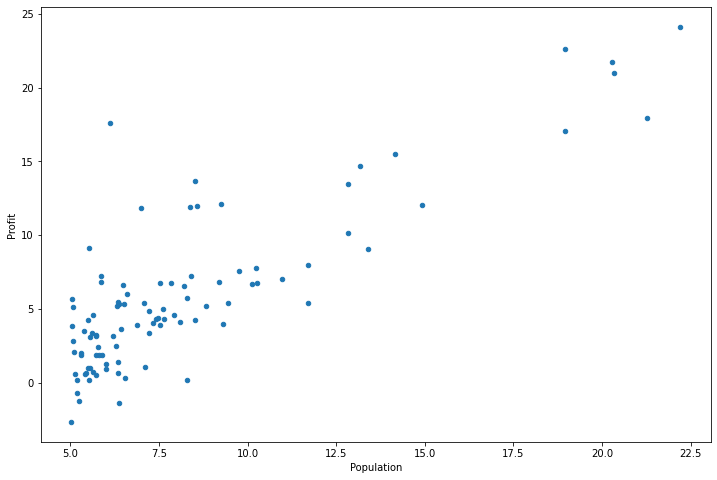

In [6]:
# melakukan ploting data
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

Now let's implement linear regression using gradient descent to minimize the cost function.  The equations implemented in the following code samples are detailed in "ex1.pdf" in the "exercises" folder.

**Artinya** 

Setelah ploting data diketahui mari mengimplemetasikan linier regressin menggunakan penurunan gradient untuk mengecilkan dari const function. Persamaan yang diimplementasikan dalam contoh kode berikut dirinci dalam "ex1.pdf" di folder "latihan".

First we'll create a function to compute the cost of a given solution (characterized by the parameters theta).

**Artinya**

Pertama kita akan membuat fungsi untuk menghitung const solusi yang diberikan (ditandai dengan parameter theta).

In [9]:
# menghitung cost
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

Let's add a column of ones to the training set so we can use a vectorized solution to computing the cost and gradients.

**Artinya**

Selanjutnya mari tambhakan satu kolom untuk tempat training, sehingga kita dapat menggunakan solusi vektor untuk menghitung biaya dan gradien.

In [10]:
# menambahkan satu kolom
data.insert(0, 'Ones', 1)

Now let's do some variable initialization, (sekarang mari lakukan beberaoa inisialisasi variabel)



In [11]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

Let's take a look to make sure X (training set) and y (target variable) look correct.

**Artinya**

Mari ambil dan lihat untuk memasastikan varibael X (training set) dan y (target variabel) berjalan dengan benar.

In [12]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [13]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


The cost function is expecting numpy matrices so we need to convert X and y before we can use them.  We also need to initialize theta.

**Artinya**

fungsi cost memerlukan numpy matriks dalam menjalankanya jadi sebelum kita menggunakanya kita harus mengkonversi varibael X (training set) dan Y (target variabel) kita juga harus menginisialisasi theta.

In [14]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

Here's what theta looks like.( Inilah tampilan dari theta)

In [16]:
# bentuk theta
theta

matrix([[0, 0]])

Let's take a quick look at the shape of our matrices.( Mari kita lihat sekilas bentuk matriks kita.)

In [17]:
# bentuk matriks
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

Now let's compute the cost for our initial solution (0 values for theta).

**Artinya**

Sekarang mari kita hitung biaya untuk solusi awal kita(theta)

In [19]:
# menghitung initial  cost 
computeCost(X, y, theta)

32.072733877455676

So far so good.  Now we need to define a function to perform gradient descent on the parameters theta using the update rules defined in the text.

**Artinya**

Sekarang kita perlu mendefinisikan fungsi untuk melakukan penurunan gradien pada parameter theta menggunakan aturan pembaruan yang ditentukan dalam teks.

In [20]:
# melakukan penurunan gradien pada parameter theta 
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

Initialize some additional variables - the learning rate alpha, and the number of iterations to perform.

**Artinya**

Inisialisasi beberapa variabel tambahan - alfa laju pembelajaran, dan jumlah iterasi yang akan dilakukan.

In [21]:
alpha = 0.01
iters = 1000

Now let's run the gradient descent algorithm to fit our parameters theta to the training set.

**Artinya**

sekarng mari jalankan algoritma penurunan gradien untuk memastikan parameter theta sebagai training set.

In [22]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

Finally we can compute the cost (error) of the trained model using our fitted parameters.

**Artinya**

Akhirnya kita dapat menghitung biaya (cost) dari model yang dilatih menggunakan parameter yang kami pasang.

In [23]:
computeCost(X, y, g)

4.515955503078914

Now let's plot the linear model along with the data to visually see how well it fits.

**Artinya**

Sekarang mari kita plot model linier beserta datanya untuk melihat secara visual seberapa cocok model tersebut.

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

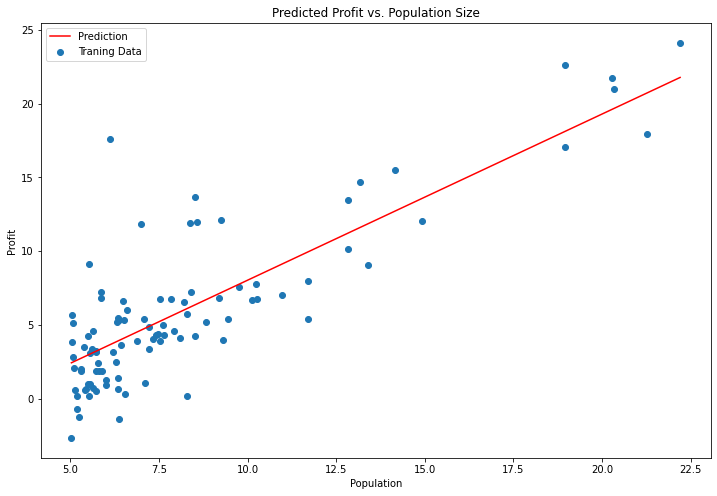

In [24]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Looks pretty good!  Since the gradient decent function also outputs a vector with the cost at each training iteration, we can plot that as well.  Notice that the cost always decreases - this is an example of a convex optimization problem.

**Artinya**

Terlihat cukup bagus! Karena fungsi gradien juga menghasilkan vektor dengan biaya pada setiap iterasi pelatihan, kita juga dapat memplotnya. Perhatikan bahwa biaya selalu menurun - ini adalah contoh masalah pada convex optimization problem.

Text(0.5, 1.0, 'Error vs. Training Epoch')

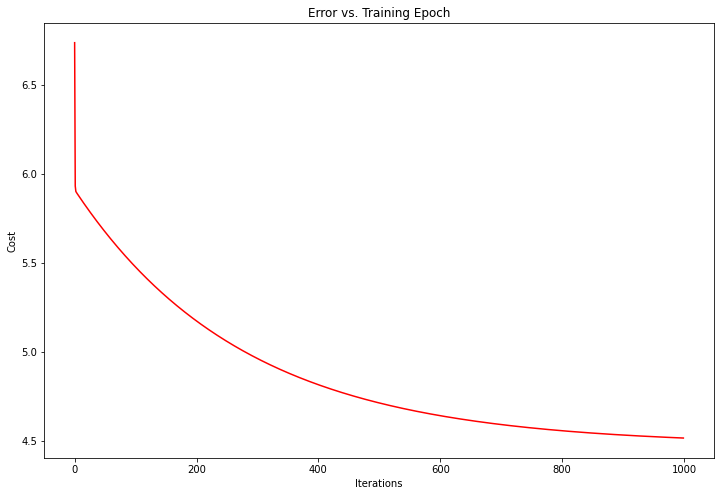

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

# **Kesimpulan **

Dalam melakukan prediksi keuntungan dengan menerapkan linier regresion dengan satu variabel hal yang harus kita lakukan adalah sebagai brikut:
1. menyipakan data yang akan diolah
2. melakukan importing libraray yang dibutuhkan
3. menampilkan data keseluruhan
4. menampilkan statistik menggunakan fungsi describe () digunakan untuk menampilkan statistik deskriptif dari data frame atau series. Output dari fungsi ini berisi rangkuman central tendency dan sebaran dari dataset. Fungsi describe () membantu kita untuk mendapatkan overview dari dataset.
5. melakukan ploting data untuk melihat karakteristik data berguna dalam menentukan model apa yang akan digunakan.
6. Setelah ploting data diketahui mari mengimplemetasikan model linier regressin menggunakan penurunan gradient untuk mengecilkan dari const function.
7. Pertama kita akan membuat fungsi untuk menghitung const, solusi yang diberikan (ditandai dengan parameter theta).
8. Selanjutnya mari tambahakan satu kolom untuk tempat training, sehingga kita dapat menggunakan solusi vektor untuk menghitung biaya dan gradien.
9. sekarang mari lakukan beberapa inisialisasi variabel(set X = training data and y = target variable).
10. lihat dan pastikan varibael X (training set) dan y (target variabel) berjalan dengan benar menggunakan sintaks x.head() dan y.head().
11. fungsi cost memerlukan numpy matriks dalam menjalankanya jadi sebelum kita menggunakanya kita harus mengkonversi varibael X (training set) dan Y (target variabel) kita juga harus menginisialisasi theta.
12. Nah setelah kita melakukan conversi variabel (x, y) dan juga menginisialisasi theta kita dapat melihat bentuk bentuk matriksnya.
13. Hitung biaya (cost) dari parameter (theta)
14. Definisikan fungsi untuk melakukan penurunan gradien pada parameter theta menggunakan aturan pembaruan yang ditentukan dalam teks.
15. Inisialisasi 
  - variabel tambahan 
  - alfa laju pembelajaran
  - jumlah iterasi yang akan dilakukan.
16. Jalankan algoritma penurunan gradien untuk memastikan parameter theta sebagai training set.
17. Akhirnya kita dapat menghitung biaya (cost) dari model yang dilatih menggunakan parameter yang kami pasang.
18. Sekarang mari kita plot model linier beserta datanya untuk melihat secara visual seberapa cocok dan melihat akurasi dari model yang digunakan.
19. Karena fungsi gradien juga menghasilkan vektor dengan biaya pada setiap iterasi pelatihan, kita juga dapat memplotnya. Perhatikan bahwa biaya selalu menurun - ini adalah contoh masalah pada convex optimization problem.





## Linear regression with multiple variables

Linier regression dengan multiple variabel

Exercise 1 also included a housing price data set with 2 variables (size of the house in square feet and number of bedrooms) and a target (price of the house).  Let's use the techniques we already applied to analyze that data set as well. Upload file for "ex1data2.txt".

**Artinya**

Pada Latihan 1 menyertakan kumpulan data harga rumah dengan 2 variabel yang pertama adalah (ukuran rumah dalam ukuran persegi dan jumlah kamar tidur) dan variabel kedua adalah target (harga rumah).


In [26]:
# melakukan upload file
uploaded2 = files.upload()


Saving ex1data2.txt to ex1data2 (1).txt


In [27]:
# melakukan pembacaan data juga menampilkan data
data2 = pd.read_csv(io.BytesIO(uploaded2['ex1data2.txt']))
data2.head()

,Size,NumberOfBedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


For this task we add another pre-processing step - normalizing the features.  This is very easy with pandas.

**Artinya**

untuk latihan ini kita akan menambhakan pre-processing step lain yang berfungsi untuk menormalkan fitur dengan menggunakan pandas.

In [28]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,NumberOfBedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


Now let's repeat our pre-processing steps from part 1 and run the linear regression procedure on the new data set.

**Artinya**

Sekarang mari ulangi pre-processing steps kita dari part 1 dan jalankann prosedure linier regression pada data set baru.

In [29]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.1307033696077189

We can take a quick look at the training progess for this one as well.( kita bisa ambil dan lihat training progres untuk bagian ini)

Text(0.5, 1.0, 'Error vs. Training Epoch')

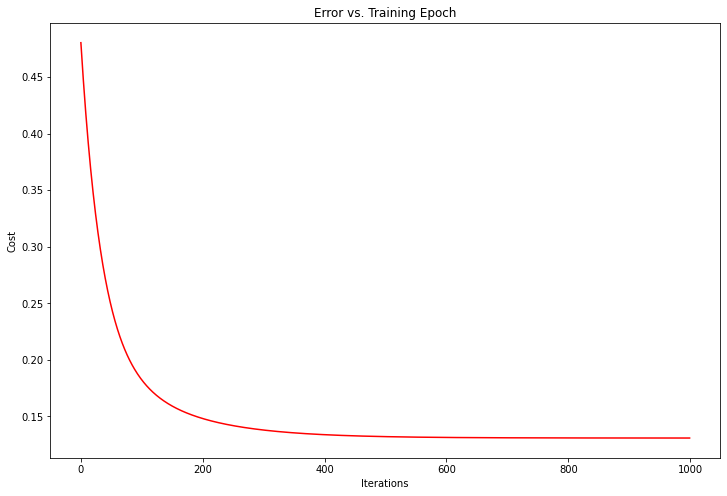

In [30]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

Instead of implementing these algorithms from scratch, we could also use scikit-learn's linear regression function.  Let's apply scikit-learn's linear regressio algorithm to the data from part 1 and see what it comes up with.

**Artinya**

Alih-alih mengimplementasikan algoritme ini dari awal, kami juga dapat menggunakan fungsi regresi linier scikit-learn. Mari terapkan algoritme regresi linier scikit-learn ke data dari bagian 1 dan lihat hasilnya.

In [31]:
# impport library sklearn
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


LinearRegression()

Here's what the scikit-learn model's predictions look like. 

( Disni kita bisa melihat bagimana scikit-learn model memprediksi sebuah data)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

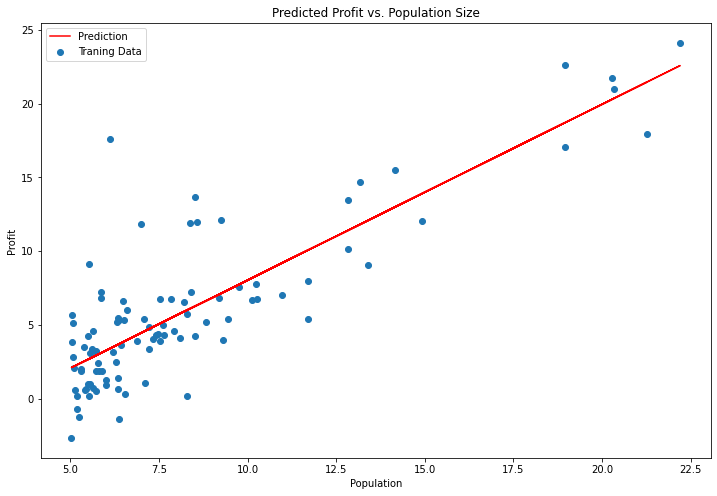

In [32]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

That's it!  Thanks for reading.  In Exercise 2 we'll take a look at logistic regression for classification problems.

# **Kesimpulan**

- Pada praktikum kedua ini yaitu prediksi menggunakan model Linier Regression Multiple Variabel secara metode hampir mirip dengan Linier Regression one variabel pembedanya yaitu terletak pada penambahan pre-processing step lain yang berfungsi untuk menormalkan fitur dengan menggunakan pandas.

- pada praktikum kedua ini juga dicoba metode prediksi menggunakan metode scikit-learn model memprediksi sebuah data. hasilnya metode ini cukup mudah diterapkan tidak terllau rumit.